In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import preprocessing

In [2]:
import glob 
files = glob.glob('*.csv') 
# ['EURUSD_historical_data.csv', 'USDJPY_historical_data.csv', 'EURJPY_historical_data.csv'] 

In [3]:
print(files)

['EURJPY_historical_data.csv', 'EURUSD_historical_data.csv', 'USDJPY_historical_data.csv']


In [4]:
df1 = pd.read_csv(r'EURUSD_historical_data.csv', sep=',')

In [5]:
df2 = pd.read_csv(r'USDJPY_historical_data.csv', sep=',')

In [6]:
df3 = pd.read_csv(r'EURJPY_historical_data.csv', sep=',')

In [7]:
#df1.head()

In [8]:
#df2.head()

In [9]:
#df3.head()

In [10]:
#df1.info()

In [11]:
#df2.info()

In [12]:
#df3.info()

In [13]:
df1.dropna(inplace=True)

In [14]:
df2.dropna(inplace=True)

In [15]:
df3.dropna(inplace=True)

In [16]:
df1.drop(['Date'], axis=1, inplace=True)

In [17]:
df2.drop(['Date'], axis=1, inplace=True)

In [18]:
df3.drop(['Date'], axis=1, inplace=True)

In [19]:
df1.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.183648,1.183909,1.183360,1.183646,-0.013247,-0.000182
std,0.002671,0.002663,0.002687,0.002669,3.986214,0.033961
min,1.178480,1.178770,1.178150,1.178470,-17.800000,-0.150000
25%,1.181950,1.182170,1.181600,1.181980,-1.900000,-0.020000
50%,1.183840,1.184090,1.183610,1.183830,0.000000,0.000000
75%,1.186060,1.186390,1.185860,1.186080,2.100000,0.020000
max,1.189350,1.189540,1.189020,1.189390,16.400000,0.140000


In [20]:
df2.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,110.580343,110.603561,110.553306,110.577013,-0.332987,-0.003039
std,0.406147,0.401732,0.412936,0.407037,3.696173,0.033694
min,109.569000,109.602000,109.535000,109.567000,-17.300000,-0.160000
25%,110.538000,110.562000,110.511000,110.532000,-2.000000,-0.020000
50%,110.654000,110.677000,110.633000,110.653000,-0.100000,0.000000
75%,110.850000,110.874000,110.833000,110.851000,1.600000,0.010000
max,111.165000,111.190000,111.151000,111.165000,12.400000,0.110000


In [21]:
df3.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,130.889421,130.921003,130.850584,130.885623,-0.379740,-0.002779
std,0.623335,0.616694,0.633185,0.622749,4.750187,0.036412
min,129.698000,129.783000,129.625000,129.700000,-23.000000,-0.170000
25%,130.417000,130.455000,130.381000,130.415000,-3.000000,-0.020000
50%,130.809000,130.834000,130.772000,130.807000,0.000000,0.000000
75%,131.603000,131.622000,131.581000,131.603000,1.800000,0.010000
max,131.836000,131.863000,131.812000,131.837000,20.100000,0.150000


In [22]:
df = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in files), ignore_index = True)

In [23]:
df.drop(['Date'], axis=1, inplace=True)

In [24]:
df.head()

,Open,High,Low,Close,Change(Pips),Change(%),filename
0,130.077,130.175,130.046,130.125,4.8,0.04,EURJPY_historical_data.csv
1,130.112,130.130,130.050,130.077,-3.5,-0.03,EURJPY_historical_data.csv
2,130.073,130.130,130.072,130.113,4.0,0.03,EURJPY_historical_data.csv
3,130.050,130.058,130.035,130.047,-0.3,0.00,EURJPY_historical_data.csv
4,130.040,130.063,130.033,130.051,1.1,0.01,EURJPY_historical_data.csv


<AxesSubplot:title={'center':'correlation of EURJPY dataset'}>

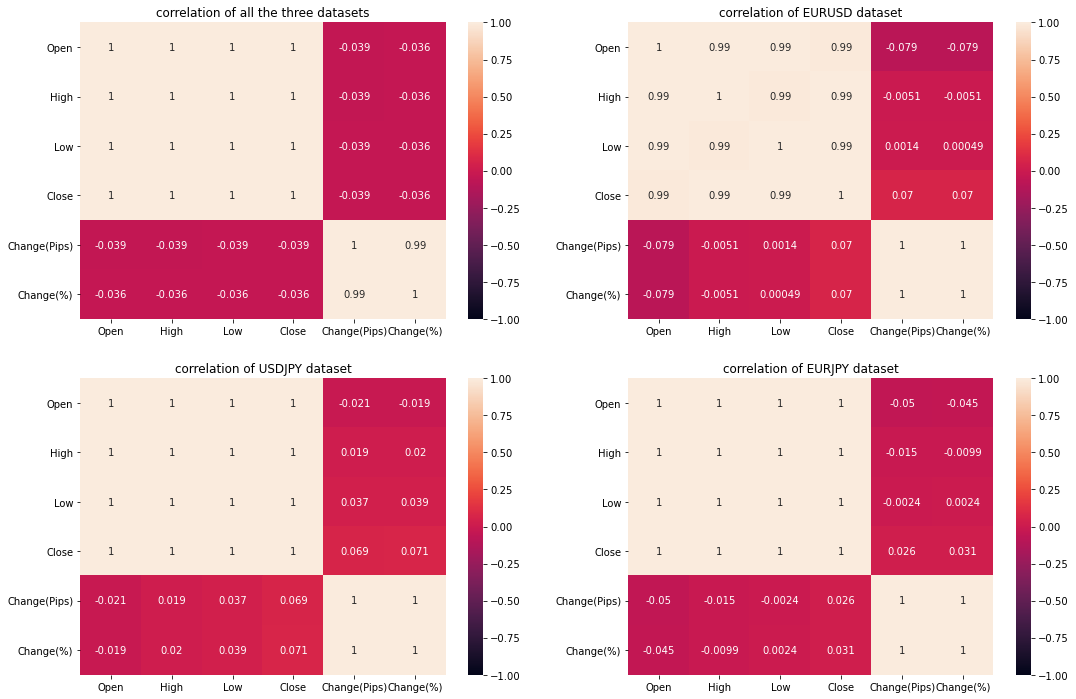

In [25]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
plt.title('correlation of all the three datasets')
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
plt.subplot(2, 2, 2)
plt.title('correlation of EURUSD dataset')
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True)
plt.subplot(2, 2, 3)
plt.title('correlation of USDJPY dataset')
sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True)
plt.subplot(2, 2, 4)
plt.title('correlation of EURJPY dataset')
sns.heatmap(df3.corr(),vmin=-1,vmax=1,annot=True)

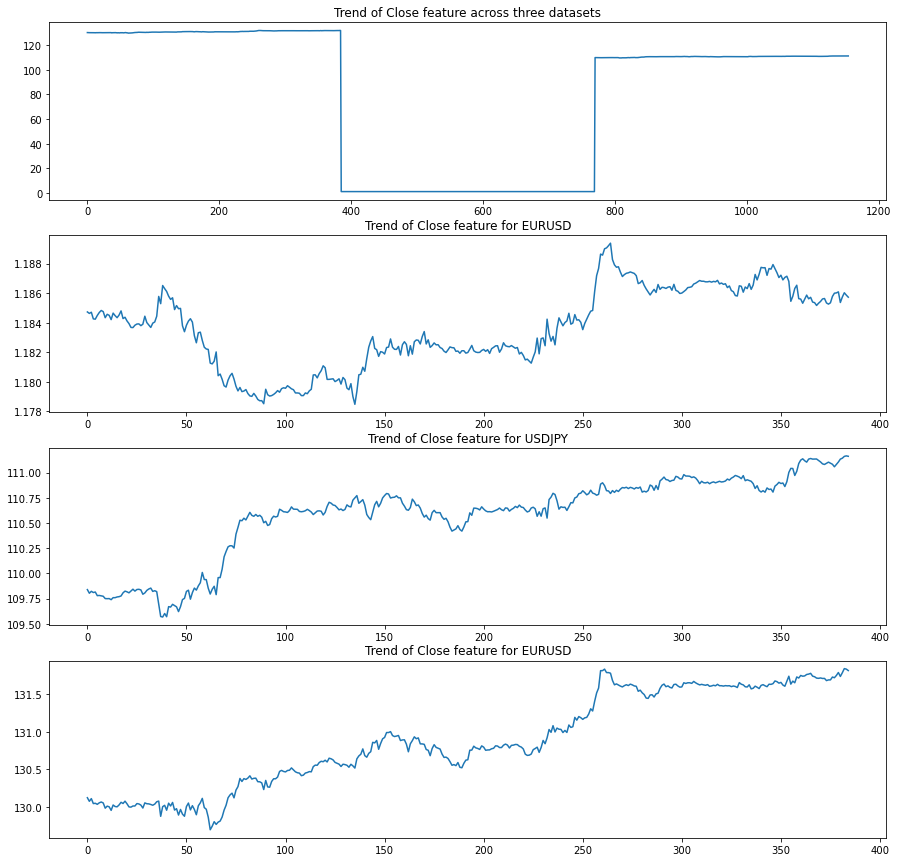

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(4, 1, 1)
plt.plot(df['Close'])
plt.title('Trend of Close feature across three datasets')
plt.subplot(4, 1, 2)
plt.plot(df1['Close'])
plt.title('Trend of Close feature for EURUSD')
plt.subplot(4, 1, 3)
plt.plot(df2['Close'])
plt.title('Trend of Close feature for USDJPY')
plt.subplot(4, 1, 4)
plt.plot(df3['Close'])
plt.title('Trend of Close feature for EURUSD')
plt.show() 

In [27]:
df.drop(['filename'], axis=1, inplace=True)

In [28]:
scaler = preprocessing.MinMaxScaler()

data = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=data)

data1 = df1.columns
d1 = scaler.fit_transform(df1)
scaled_df1 = pd.DataFrame(d1, columns=data1)

data2 = df2.columns
d2 = scaler.fit_transform(df2)
scaled_df2 = pd.DataFrame(d2, columns=data2)

data3 = df3.columns
d3 = scaler.fit_transform(df3)
scaled_df3 = pd.DataFrame(d3, columns=data3)

In [29]:
scaled_df.head()

,Open,High,Low,Close,Change(Pips),Change(%)
0,0.986537,0.987083,0.986481,0.986897,0.645012,0.65625
1,0.986805,0.986739,0.986512,0.986530,0.452436,0.43750
2,0.986507,0.986739,0.986680,0.986805,0.626450,0.62500
3,0.986331,0.986188,0.986397,0.986300,0.526682,0.53125
4,0.986254,0.986226,0.986382,0.986331,0.559165,0.56250


In [30]:
scaled_df1.head()

,Open,High,Low,Close,Change(Pips),Change(%)
0,0.568537,0.572888,0.583257,0.573260,0.540936,0.551724
1,0.573137,0.558032,0.592456,0.564103,0.497076,0.482759
2,0.542778,0.558032,0.571297,0.571429,0.616959,0.620690
3,0.528059,0.509749,0.543698,0.530220,0.532164,0.517241
4,0.557498,0.545032,0.551978,0.528388,0.432749,0.413793


In [31]:
scaled_df2.head()

,Open,High,Low,Close,Change(Pips),Change(%)
0,0.148496,0.173804,0.158416,0.170213,0.693603,0.703704
1,0.161028,0.153023,0.150371,0.147685,0.505051,0.518519
2,0.156015,0.145466,0.168317,0.159574,0.595960,0.592593
3,0.155388,0.142317,0.168936,0.152065,0.558923,0.555556
4,0.130952,0.140428,0.149134,0.155194,0.707071,0.703704


In [32]:
scaled_df3.head()

,Open,High,Low,Close,Change(Pips),Change(%)
0,0.177268,0.188462,0.192501,0.198877,0.645012,0.65625
1,0.193639,0.166827,0.194330,0.176416,0.452436,0.43750
2,0.175398,0.166827,0.204390,0.193262,0.626450,0.62500
3,0.164640,0.132212,0.187471,0.162377,0.526682,0.53125
4,0.159963,0.134615,0.186557,0.164249,0.559165,0.56250


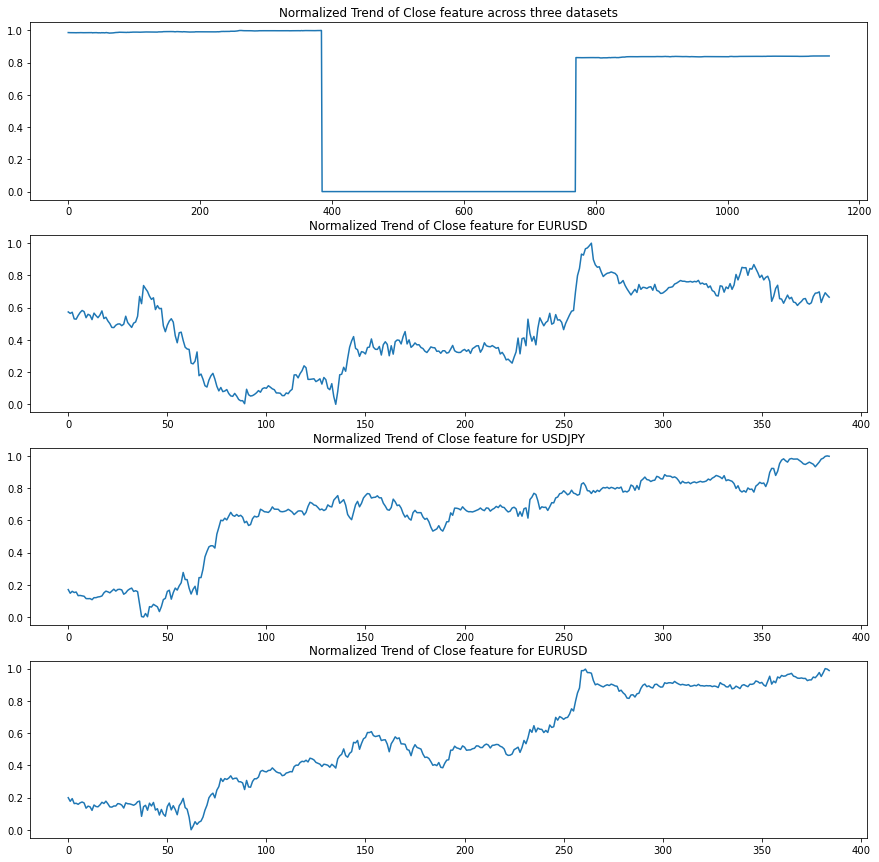

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(4, 1, 1)
plt.plot(scaled_df['Close'])
plt.title('Normalized Trend of Close feature across three datasets')
plt.subplot(4, 1, 2)
plt.plot(scaled_df1['Close'])
plt.title('Normalized Trend of Close feature for EURUSD')
plt.subplot(4, 1, 3)
plt.plot(scaled_df2['Close'])
plt.title('Normalized Trend of Close feature for USDJPY')
plt.subplot(4, 1, 4)
plt.plot(scaled_df3['Close'])
plt.title('Normalized Trend of Close feature for EURUSD')
plt.show()

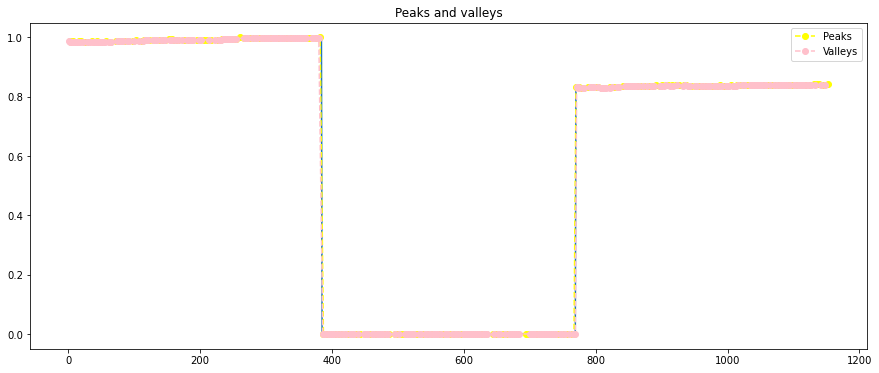

In [34]:
from scipy import signal

# Find peaks
peak_indexes = signal.argrelextrema(scaled_df['Close'].values, np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys
valley_indexes = signal.argrelextrema(scaled_df['Close'].values, np.less)
valley_indexes = valley_indexes[0]
 
# Plotting main graph
(fig, ax) = plt.subplots(figsize=(15,6))
ax.plot(scaled_df['Close'])
 
# Plotting peaks
peak_x = peak_indexes
peak_y = scaled_df['Close'][peak_indexes]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='yellow', label="Peaks")
 
# Plotting valleys
valley_x = valley_indexes
valley_y = scaled_df['Close'][valley_indexes]
ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='pink', label="Valleys")

plt.title('Peaks and valleys')
plt.legend()

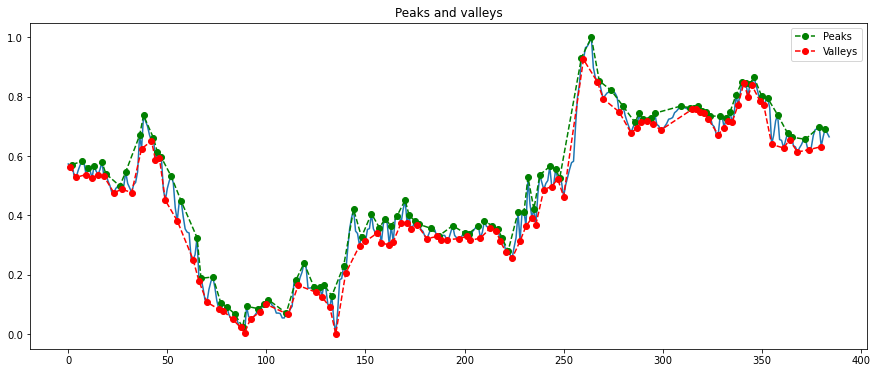

In [35]:
# Find peaks
peak_indexes = signal.argrelextrema(scaled_df1['Close'].values, np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys
valley_indexes = signal.argrelextrema(scaled_df1['Close'].values, np.less)
valley_indexes = valley_indexes[0]
 
# Plotting main graph
(fig, ax) = plt.subplots(figsize=(15,6))
ax.plot(scaled_df1['Close'])
 
# Plotting peaks
peak_x = peak_indexes
peak_y = scaled_df1['Close'][peak_indexes]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='green', label="Peaks")
 
# Plotting valleys
valley_x = valley_indexes
valley_y = scaled_df1['Close'][valley_indexes]
ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='red', label="Valleys")

plt.title('Peaks and valleys')
plt.legend()

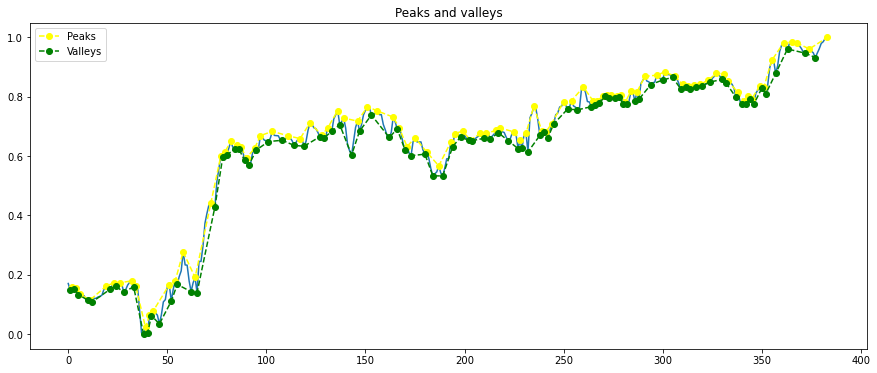

In [36]:
# Find peaks
peak_indexes = signal.argrelextrema(scaled_df2['Close'].values, np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys
valley_indexes = signal.argrelextrema(scaled_df2['Close'].values, np.less)
valley_indexes = valley_indexes[0]
 
# Plotting main graph
(fig, ax) = plt.subplots(figsize=(15,6))
ax.plot(scaled_df2['Close'])
 
# Plotting peaks
peak_x = peak_indexes
peak_y = scaled_df2['Close'][peak_indexes]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='yellow', label="Peaks")
 
# Plotting valleys
valley_x = valley_indexes
valley_y = scaled_df2['Close'][valley_indexes]
ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='green', label="Valleys")

plt.title('Peaks and valleys')
plt.legend()

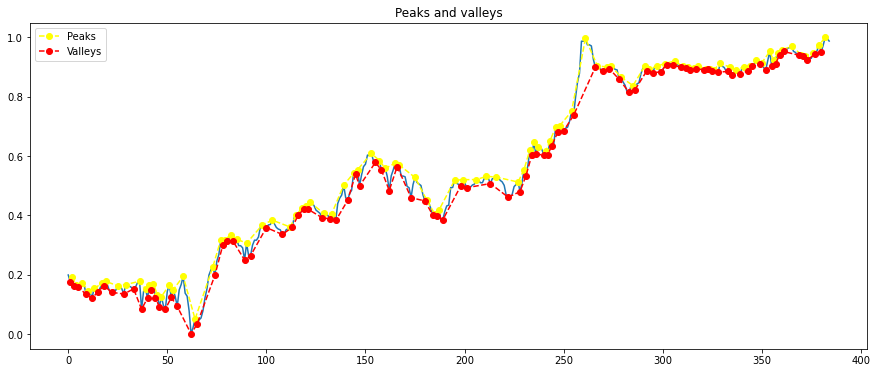

In [37]:
# Find peaks
peak_indexes = signal.argrelextrema(scaled_df3['Close'].values, np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys
valley_indexes = signal.argrelextrema(scaled_df3['Close'].values, np.less)
valley_indexes = valley_indexes[0]
 
# Plotting main graph
(fig, ax) = plt.subplots(figsize=(15,6))
ax.plot(scaled_df3['Close'])
 
# Plotting peaks
peak_x = peak_indexes
peak_y = scaled_df3['Close'][peak_indexes]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='yellow', label="Peaks")
 
# Plotting valleys
valley_x = valley_indexes
valley_y = scaled_df3['Close'][valley_indexes]
ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='red', label="Valleys")

plt.title('Peaks and valleys')
plt.legend()

In [38]:
X = df1.drop(['Close'],axis = 1)
X.head()

,Open,High,Low,Change(Pips),Change(%)
0,1.18466,1.18494,1.18449,0.7,0.01
1,1.18471,1.18478,1.18459,-0.8,-0.01
2,1.18438,1.18478,1.18436,3.3,0.03
3,1.18422,1.18426,1.18406,0.4,0.00
4,1.18454,1.18464,1.18415,-3.0,-0.03


In [39]:
y = df1['Close']
y.head()

0    1.18473
1    1.18463
2    1.18471
3    1.18426
4    1.18424
Name: Close, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=36)

In [41]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred = reg_rf.predict(X_test)

In [43]:
reg_rf.score(X_train, y_train)

0.9991305912881321

In [44]:
reg_rf.score(X_test, y_test)

0.996218677112105

In [45]:
selection = RandomForestRegressor()
selection.fit(X, y)

RandomForestRegressor()

In [46]:
print(selection.feature_importances_)

[0.02550204 0.2185568  0.7533634  0.00169637 0.00088138]


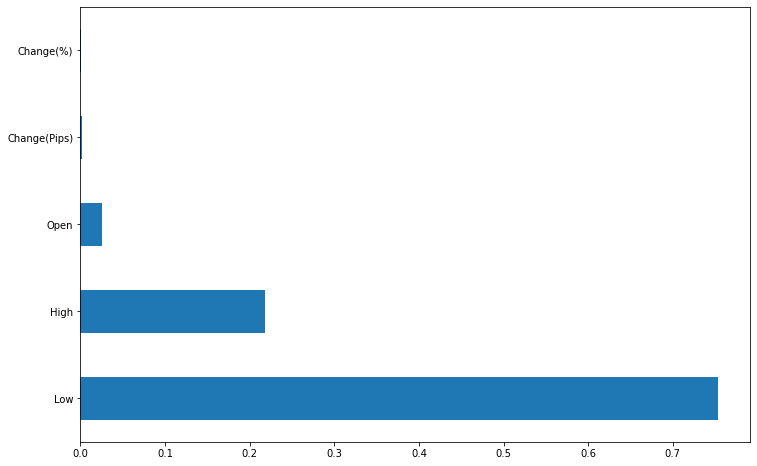

In [47]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

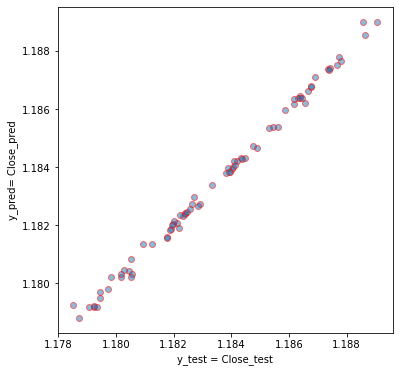

In [48]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, y_pred, alpha = 0.5, marker ="o", edgecolor ="red")
plt.xlabel("y_test = Close_test")
plt.ylabel("y_pred= Close_pred")
plt.show()

In [49]:
from keras.models import Sequential
from keras.layers import Activation, Input, LSTM